<br>
<font>
<!-- <img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" alt="SUT logo" width=300 height=300 align=left class="saturate"> -->
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=200 height=200>
<br>
<font color=0F5298 size=8>
Introduction to Machine Learning <br>
<font color=696880 size=5>
<!-- <br> -->
Computer Engineering Department
<br>
Sharif University of Technology

<font color=696880 size=5>
<br>
CE 40477 - Fall 2024

<font color=GREEN size=5>
<br>
Mahan Bayhaghi & Arshia Gharooni

This version is revised and changed by Abolfazl Delavar
<!-- <br> -->

____



# Regression
In this section, we will try to solve the problem of **Regression**. In our first step, we will atack the problem from the analytical view.

### Generate Synthetic Data

We will use rather simple line of $ y = 3x + 8 $ with noise of $ \epsilon = 5 $ to generate test and train data:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_data(n=50, noise=5.0):
    np.random.seed(42)
    X = np.linspace(-10, 10, n)
    # Ground truth line: y = 3x + 8
    true_slope = 3
    true_intercept = 8
    noise = np.random.randn(n) * noise
    y = true_slope * X + true_intercept + noise
    return X, y

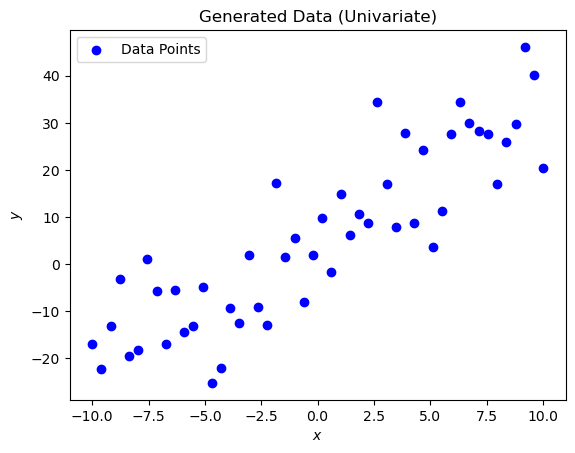

In [3]:
X, y = generate_data(n=50, noise=10.0)
plt.scatter(X, y, color='blue', label='Data Points')
plt.title("Generated Data (Univariate)")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

## Linear Regression: Analytical Solution

### Implement the Closed-Form Solution

In [4]:
# Hypothesis: h_w(x) = w_0 + w_1 * x_1
def h_w(x, w):
    return w[0] + w[1] * x  # equivalent to w_0 + w_1 * x

# Linear Regression using closed-form solution
def linear_regression_closed_form(X, y):
    # Adding bias term (x_0 = 1) to input vector X
    X_b = np.c_[np.ones((len(X), 1)), X]  # X_b is now the full input vector with bias term
    # Closed-form solution: w = (X^T * X)^-1 * X^T * y
    w = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return w

# Get parameter vector w
w = linear_regression_closed_form(X, y)
print(f"Parameters (w): ")
print(f"w_1 = {w[1]:.2f}, w_0 = {w[0]:.2f}")


Parameters (w): 
w_1 = 2.71, w_0 = 5.75


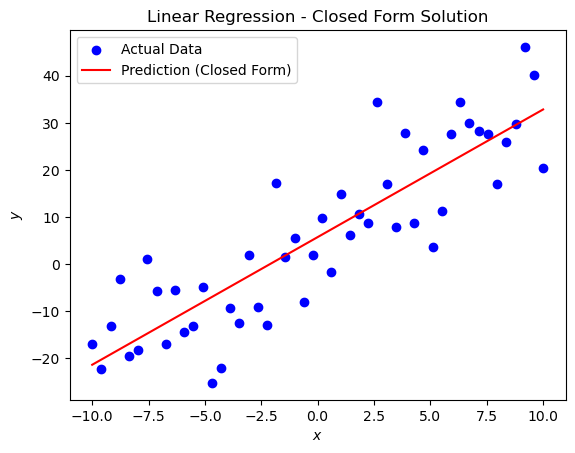

In [5]:
y_pred = h_w(X, w)

plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Prediction (Closed Form)')
plt.title("Linear Regression - Closed Form Solution")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

## Polynomial Regression: Analytical Solution
Linear regression can be extended to model nonlinear relationships by introducing polynomial terms.


### Engineering Polynomial Features

In [6]:
# Function to generate polynomial features (input matrix X')
def polynomial_features(X, degree):
    X_poly = np.c_[np.ones(len(X))]
    for i in range(1, degree + 1):
        X_poly = np.c_[X_poly, X**i]
    return X_poly

### Implement Polynomial Regression

In [7]:
def polynomial_regression(X, y, degree):
    X_poly = polynomial_features(X, degree)
    # Closed-form solution: w = (X'^T * X')^-1 * X'^T * y
    w = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)
    return w

m = 5  # Degree of the polynomial regression
w_poly = polynomial_regression(X, y, m)  # Parameter vector w

print(f"Parameters (w) for Degree {m}: {w_poly}")


Parameters (w) for Degree 5: [ 3.76225623e+00  4.11915524e+00  6.56217891e-02 -4.30987468e-02
 -1.35616512e-04  2.76350988e-04]


### Visualize the Polynomial Fit

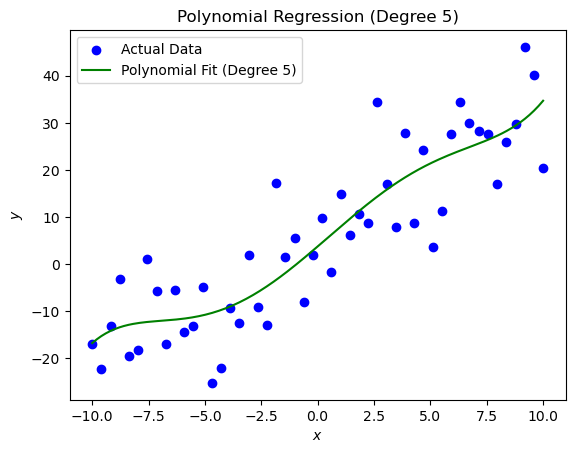

In [8]:
X_fit = np.linspace(X.min(), X.max(), 200)
X_fit_poly = polynomial_features(X_fit, m)
y_poly_pred = X_fit_poly.dot(w_poly)  # h_w(x) = X' * w

# Plot the actual data and the polynomial fit
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_fit, y_poly_pred, color='green', label=f'Polynomial Fit (Degree {m})')
plt.title(f"Polynomial Regression (Degree {m})")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()


### Implement Polynomial Regression (3D)

In [9]:
def real_function(X):
    x1, x2 = X
    # True wights for m = 2: [8, 0, 1, 3, -5]
    # Ground truth plane: y = 3x1^2 - x2 + 8
    return 3*x1**2 - 5*x2**2 + x2 + 8

def generate_data_3d(n=100, noise=5.0):
    np.random.seed(42)
    X1 = np.linspace(-10, 10, np.int32(np.sqrt(n))+1)
    X2 = np.linspace(-10, 10, np.int32(np.sqrt(n))+1)
    # Create the meshgrid
    X1_grid, X2_grid = np.meshgrid(X1, X2)
    # Flatten the grids and stack them as columns to form the matrix
    X = np.column_stack([X1_grid.ravel(), X2_grid.ravel()])
    X = X[0:n,:]
    # Apply the function to each row of the result matrix
    y = np.apply_along_axis(real_function, 1, X)
    noise = np.random.randn(n) * noise
    y = y + noise
    return X, y

X_3d, y_3d = generate_data_3d(n=1000, noise=40)

m_3d = 2  # Degree of the polynomial regression
w_poly_3d = polynomial_regression(X_3d, y_3d, m_3d)  # Parameter vector w

print(f"Parameters (w) for Degree {m_3d}: {w_poly_3d}")


Parameters (w) for Degree 2: [ 9.24985531e+00 -7.92555507e-03  1.24615402e+00  2.97663686e+00
 -4.98774125e+00]


### Visualize the Polynomial Fit (3D)

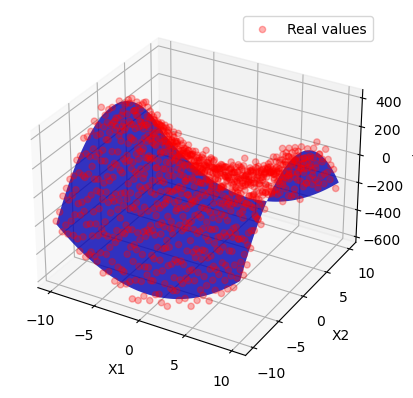

In [10]:
# Create meshgrid for plotting the estimated plane
x_surf, y_surf = np.meshgrid(np.linspace(X_3d[:,0].min(), X_3d[:,0].max(), 100),
                             np.linspace(X_3d[:,1].min(), X_3d[:,1].max(), 100))
X_surf = np.column_stack([x_surf.ravel(), y_surf.ravel()])

X_fit_poly_3d = polynomial_features(X_surf, m_3d)
y_poly_pred_3d = X_fit_poly_3d.dot(w_poly_3d)  # h_w(x) = X' * w
y_poly_pred_3d = y_poly_pred_3d.reshape(x_surf.shape)

# X_surf_poly = poly.transform(X_surf)
# z_surf = model.predict(X_surf_poly).reshape(x_surf.shape)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Real data points
ax.scatter(X_3d[:, 0], X_3d[:, 1], y_3d, c='r', marker='o', alpha=0.3, label='Real values')
# Estimated plane
ax.plot_surface(x_surf, y_surf, y_poly_pred_3d, color='b', alpha=0.8, rstride=100, cstride=100)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.legend()
plt.show()


## Visualizing $E_{rms}$
The Root Mean Square Error (RMSE) helps us understand how well our model fits the data.

In [11]:
def compute_rms_error(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

### Visualizing RMSE for different Polynomial degrees
We could visualize the $ E_{rms} $ better if we split generated data into train and test datasets:

Degree 0: Train RMSE = 18.19, Test RMSE = 19.15


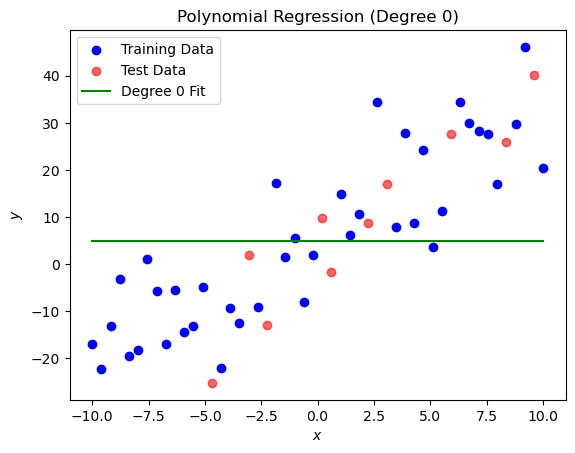

Degree 1: Train RMSE = 9.16, Test RMSE = 8.97


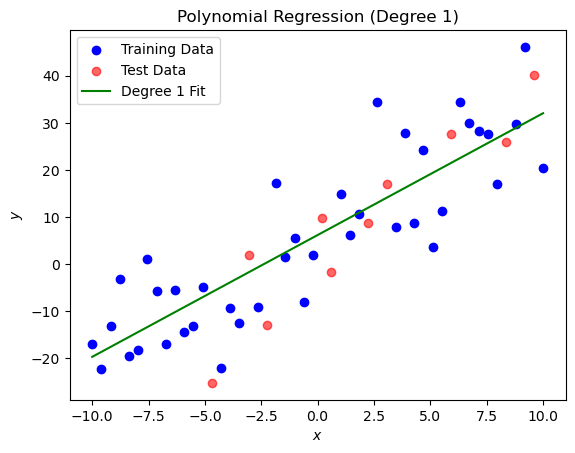

Degree 2: Train RMSE = 9.10, Test RMSE = 8.48


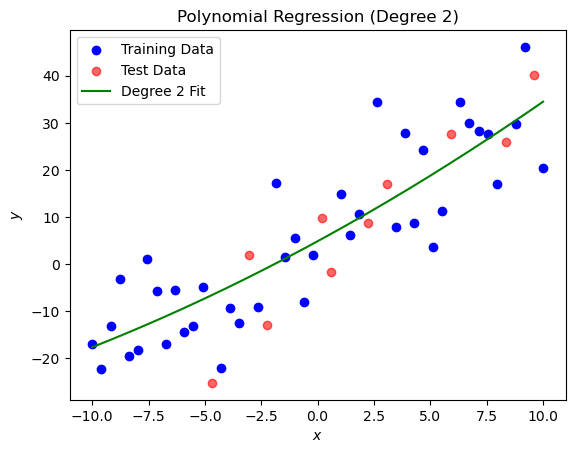

Degree 3: Train RMSE = 8.94, Test RMSE = 8.23


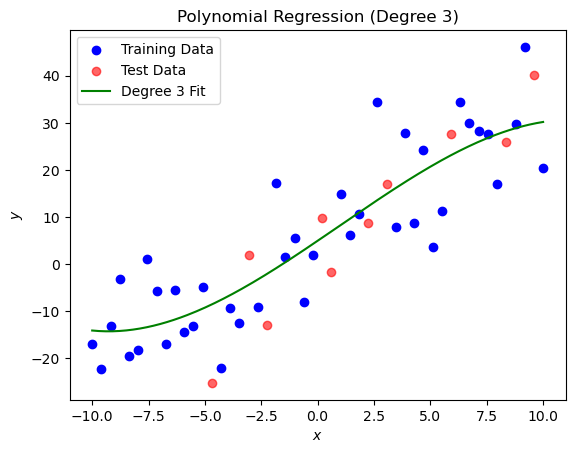

Degree 4: Train RMSE = 8.93, Test RMSE = 8.28


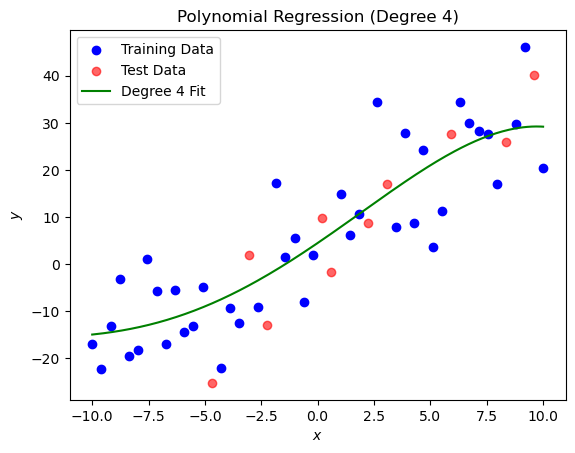

Degree 5: Train RMSE = 8.89, Test RMSE = 8.06


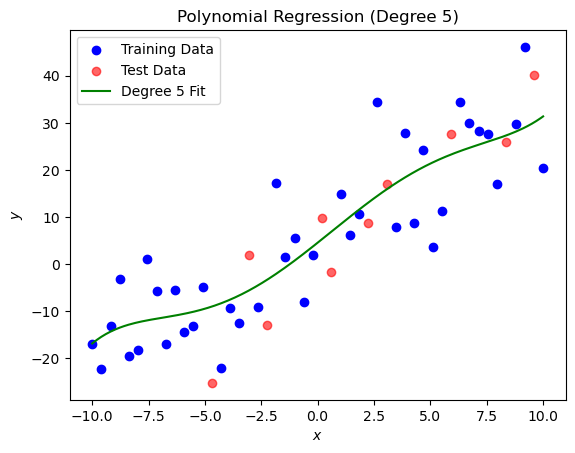

Degree 6: Train RMSE = 8.52, Test RMSE = 8.30


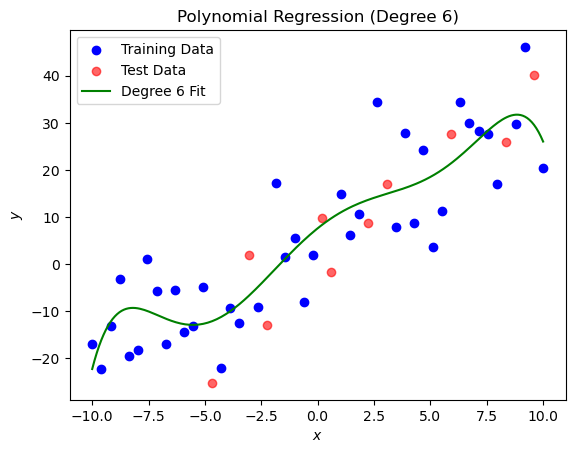

Degree 7: Train RMSE = 8.40, Test RMSE = 8.78


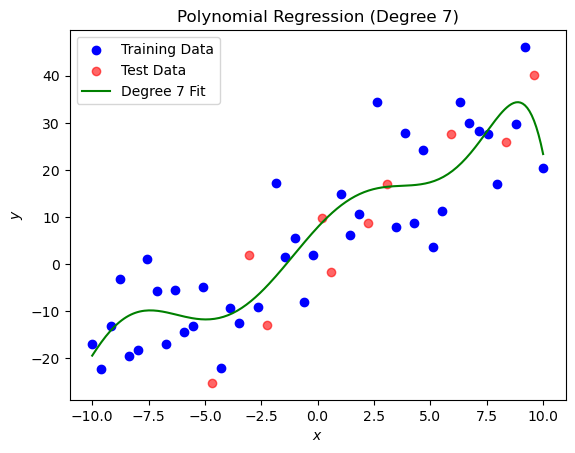

Degree 8: Train RMSE = 8.39, Test RMSE = 8.77


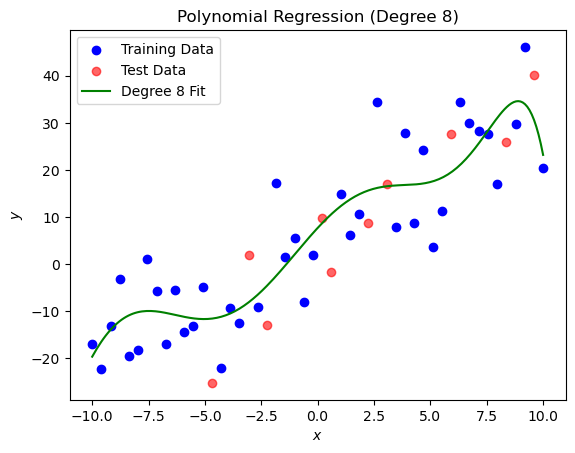

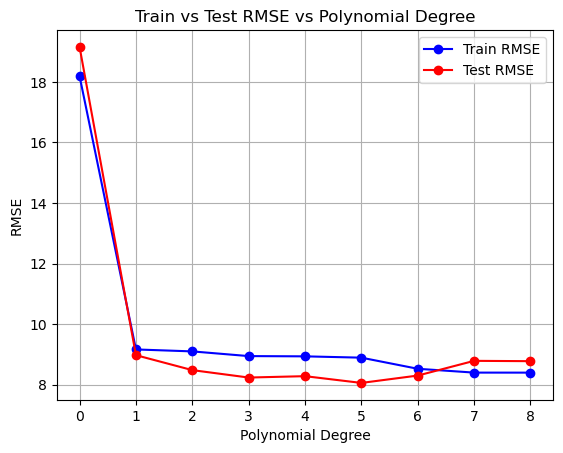

In [12]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degrees = range(0, 9)
train_rms_errors = []
test_rms_errors = []


for d in degrees:
    # Train the model on the training set
    w_poly = polynomial_regression(X_train, y_train, d)

    # Compute predictions for the training set
    X_train_poly = polynomial_features(X_train, d)
    y_train_pred = X_train_poly.dot(w_poly)

    # Compute predictions for the test set
    X_test_poly = polynomial_features(X_test, d)
    y_test_pred = X_test_poly.dot(w_poly)

    # Calculate RMSE for both training and test sets
    train_rms_error = compute_rms_error(y_train, y_train_pred)
    test_rms_error = compute_rms_error(y_test, y_test_pred)

    # Store the errors
    train_rms_errors.append(train_rms_error)
    test_rms_errors.append(test_rms_error)

    # Print the RMSE for the current degree
    print(f"Degree {d}: Train RMSE = {train_rms_error:.2f}, Test RMSE = {test_rms_error:.2f}")

    # Plot the polynomial fit on the training data
    plt.scatter(X_train, y_train, color='blue', label="Training Data")
    plt.scatter(X_test, y_test, color='red', label="Test Data", alpha=0.6)
    X_fit = np.linspace(X.min(), X.max(), 200)
    X_fit_poly = polynomial_features(X_fit, d)
    y_fit_pred = X_fit_poly.dot(w_poly)
    plt.plot(X_fit, y_fit_pred, label=f"Degree {d} Fit", color='green')
    plt.title(f"Polynomial Regression (Degree {d})")
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.legend()
    plt.show()

# Plot RMSE for training and test sets
plt.plot(degrees, train_rms_errors, marker='o', linestyle='-', color='blue', label='Train RMSE')
plt.plot(degrees, test_rms_errors, marker='o', linestyle='-', color='red', label='Test RMSE')
plt.title("Train vs Test RMSE vs Polynomial Degree")
plt.xlabel("Polynomial Degree")
plt.ylabel("RMSE")
plt.xticks(degrees)
plt.grid(True)
plt.legend()
plt.show()

As you can see from the RMSE plot above, by increasing the degree polynomial, the training error never increases **(Why ?)**. However; testing error can increase.

## Gradient Descent:
In this section, we will use the popular iterative method called **Gradient Descent** to solve the regression problem.

Assuming we need to find $ w_0\ and\ w_1 $ in the problem of linear regression, update rule using gradinet descent will be:
$$
\begin{array}{l}
w_0 \leftarrow w_0 - \eta \frac{\partial J}{\partial w_0} = w_0 - \eta \sum_{i=1}^{m} (h_w(x^{(i)}) - y^{(i)}) \\
w_1 \leftarrow w_1 - \eta \frac{\partial J}{\partial w_1} = w_1 - \eta \sum_{i=1}^{m} (h_w(x^{(i)}) - y^{(i)}) (x^{(i)}) \\
\end{array}
$$

In which $ \eta $ is the learning rate. To overcome the problem of overflow, assume cost function is $ J(\mathbf{w}) = \frac{SSE}{training \ \ size} $

### Implementing GD for linear regression

In [13]:
# Test area
a = np.random.rand(20)
a

array([0.16748258, 0.10456784, 0.63643025, 0.70647573, 0.03158614,
       0.93621225, 0.05197128, 0.54129634, 0.70906052, 0.87096912,
       0.71408693, 0.80172808, 0.33945019, 0.81482511, 0.08011485,
       0.89481666, 0.54759238, 0.81729777, 0.45231828, 0.6435777 ])

In [14]:
#Test area
a[::5]

array([0.16748258, 0.93621225, 0.71408693, 0.89481666])

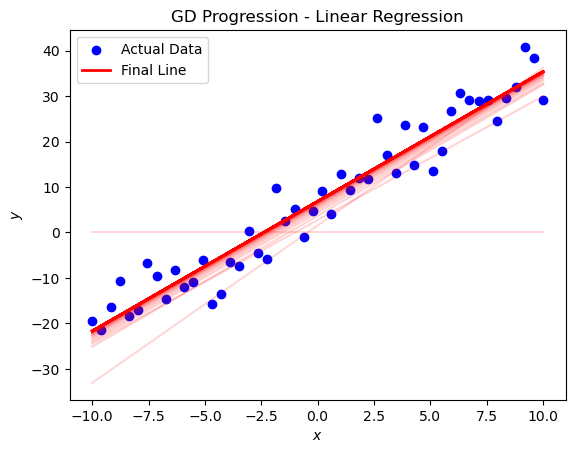

In [15]:
# SSE cost function
def cost_function(X, y, w):
    return np.sum((h_w(X, w) - y)**2) / len(X)

# Gradient descent
def gradient_descent(X, y, w, alpha, num_iters):
    m = len(X)
    cost_history = []
    w_history = [w.copy()]

    for i in range(num_iters):
        # updates
        gradient_w0 = np.sum(h_w(X, w) - y) / m
        gradient_w1 = np.sum((h_w(X, w) - y) * X) / m
        w[0] -= alpha * gradient_w0
        w[1] -= alpha * gradient_w1

        cost_history.append(cost_function(X, y, w))
        w_history.append(w.copy())  # Store a copy of w, not the reference

    return w, cost_history, w_history

X, y = generate_data(n=50, noise=5.0)
w_initial = [0, 0]  # Start with w0 = 0, w1 = 0
eta = 0.05  # Learning rate
num_iters = 500

# Run Gradient Descent
w_final, cost_history, w_history = gradient_descent(X, y, w_initial, eta, num_iters)

# Visualize cost function (log of J(w))
w0_vals = np.linspace(-10, 20, 100)
w1_vals = np.linspace(-1, 5, 100)
J_vals = np.zeros((len(w0_vals), len(w1_vals)))

for i in range(len(w0_vals)):
    for j in range(len(w1_vals)):
        w = [w0_vals[i], w1_vals[j]]
        J_vals[i, j] = cost_function(X, y, w)

# Plot GD Progression (without labels for lines, different alphas)
plt.scatter(X, y, color='blue', label='Actual Data')

# Plot lines for every 50th step with increasing alpha
for idx, w in enumerate(w_history[::num_iters // 100]):
    alpha = 0.15 + 0.85*(idx) / 100  # Gradually increase alpha for each line
    plt.plot(X, h_w(X, w), color='red', alpha=alpha)

# Final line in bold
plt.plot(X, h_w(X, w_final), color='red', lw=2, label='Final Line')

plt.title("GD Progression - Linear Regression")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

As you can see from the lines above, we first started by a neutral hypothesis which was a simple line $ y = 0 $. The update at each iteration tries to minimize cost function thus improving weights. As you can see, the final line after 500 iterations is the line best describing datapoints. **But how can we be sure that cost function is optimizable ?**

### Plotting cost function
To get a better sense of SSE cost function, let's visualize it for univariate linear regression discussed:

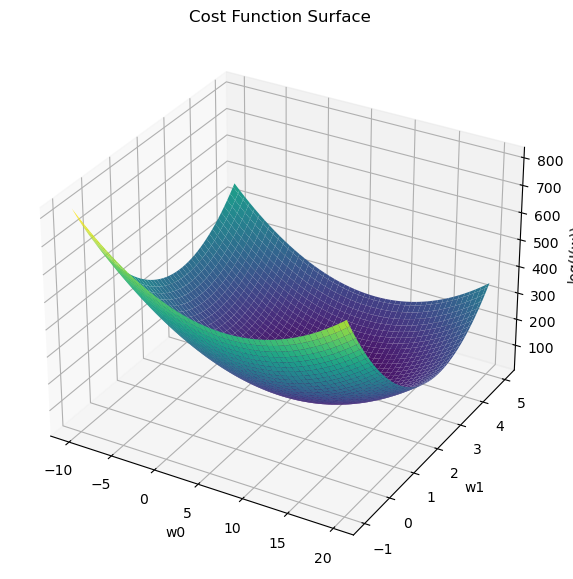

In [16]:
# 3D Plot of J(w)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
W0, W1 = np.meshgrid(w0_vals, w1_vals)
ax.plot_surface(W0, W1, J_vals.T, cmap='viridis')
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('log(J(w))')
plt.title("Cost Function Surface")
plt.show()


The plot above can be somewhat confusing. Let us visualize $ log J(\mathbf{w}) $ instead:

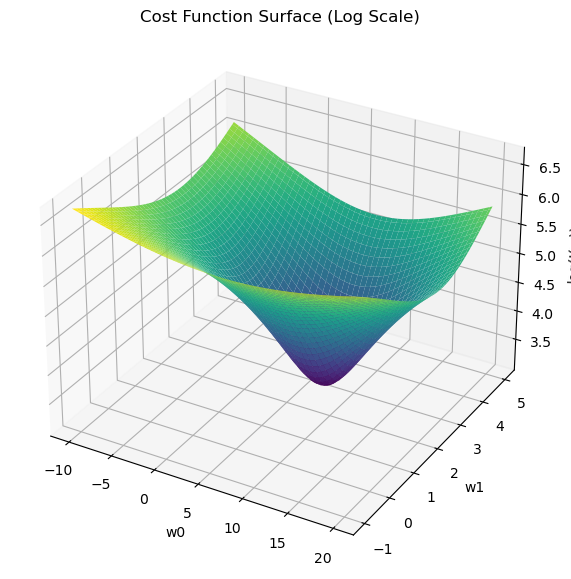

In [17]:
# 3D Plot of log J(w)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
W0, W1 = np.meshgrid(w0_vals, w1_vals)
ax.plot_surface(W0, W1, np.log(J_vals.T), cmap='viridis')
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('log(J(w))')
plt.title("Cost Function Surface (Log Scale)")
plt.show()

Gradient descent tries to reach minimum point of the plot above in each step. But are we actually reaching our goal ? Let's visualize it:

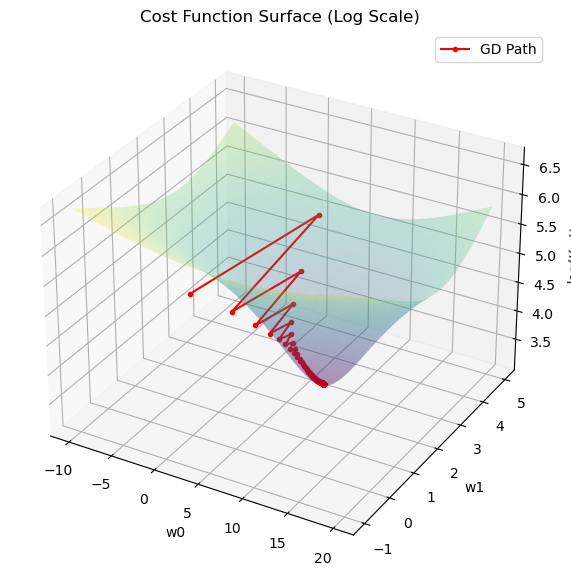

In [18]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
W0, W1 = np.meshgrid(w0_vals, w1_vals)
ax.plot_surface(W0, W1, np.log(J_vals.T), cmap='viridis', alpha=0.25)
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('log(J(w))')
plt.title("Cost Function Surface (Log Scale)")

# Plot the points on the 3D surface for each GD iteration
w_history_array = np.array(w_history)  # Convert list to array for easier slicing
w0_history = w_history_array[:, 0]
w1_history = w_history_array[:, 1]
cost_history_log = np.log(np.array(cost_history))  # Log of the cost history

# Plot the path of gradient descent in 3D
ax.plot(w0_history[:num_iters], w1_history[:num_iters], cost_history_log, marker='o', color='r', label='GD Path', markersize=3)

plt.legend()
plt.show()

As shown in the plot above, GD is trying to reach optimal point at each step.

### Effect of learning rate ($ \eta $)
Choosing $ \eta $ could be tricky. Large learning rates can lead to divergence. Small learning rates on the other hand could slow down the convergence by requiring more iterations:

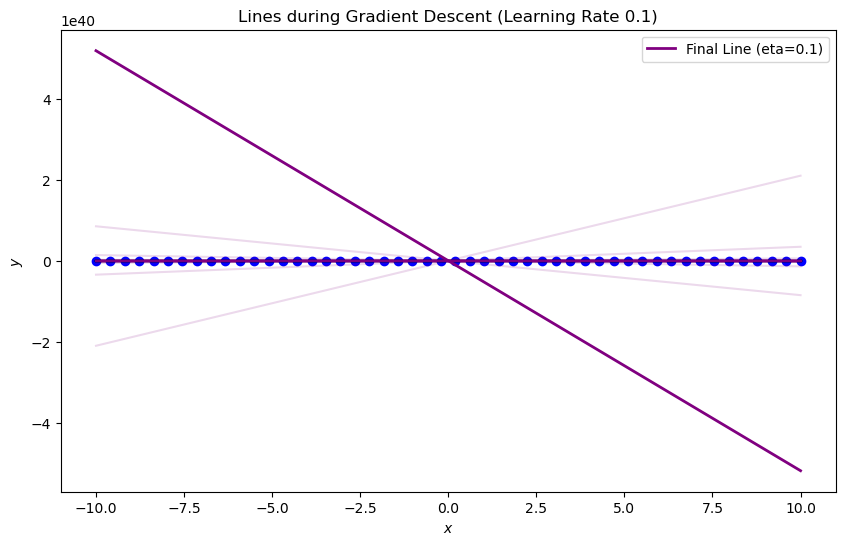

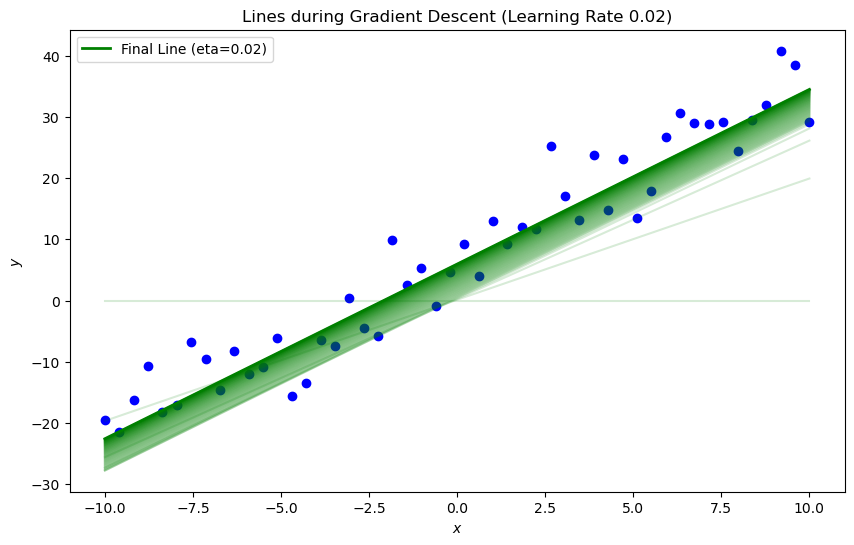

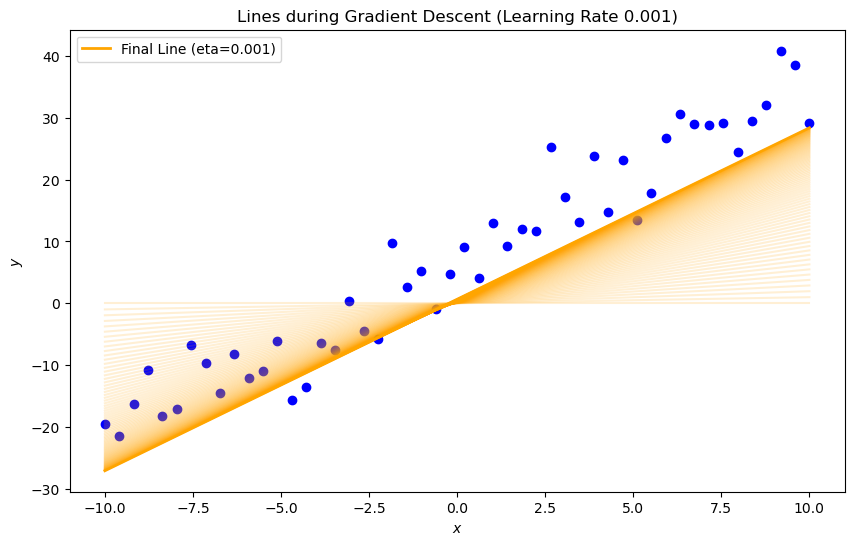

In [19]:
learning_rates = [0.1, 0.02, 0.001]
num_iters = 100
w_initial = [0, 0]

colors = ['purple', 'green', 'orange']

w0_vals = np.linspace(-10, 20, 100)
w1_vals = np.linspace(-1, 5, 100)
J_vals = np.zeros((len(w0_vals), len(w1_vals)))

for i in range(len(w0_vals)):
    for j in range(len(w1_vals)):
        w = [w0_vals[i], w1_vals[j]]
        J_vals[i, j] = cost_function(X, y, w)

cost_histories = []

# GD for each eta
for idx, eta in enumerate(learning_rates):
    w_final, cost_history, w_history = gradient_descent(X, y, w_initial.copy(), eta, num_iters)
    cost_histories.append(cost_history)

    plt.figure(figsize=(10, 6))
    for step_idx, w in enumerate(w_history[::num_iters // 100]):
        alpha_val = 0.15 + 0.85*(idx) / 100
        plt.plot(X, h_w(X, w), color=colors[idx], alpha=alpha_val)

    plt.plot(X, h_w(X, w_final), lw=2, label=f'Final Line (eta={eta})', color=colors[idx])
    plt.title(f"Lines during Gradient Descent (Learning Rate {eta})")
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.legend()
    plt.scatter(X, y, color='blue', label='Actual Data')
    plt.show()


As shown in the plots above, choosing a large learning rate leads to divergence. In this example, the update rule keeps making weights larger and larger and the weights will never converge. Choosing a small learning rate on the other hand, leads to slow convergence. In this example, learning $ w_0 $ is happening at a slow time because the update rule is being changed almost minimially !

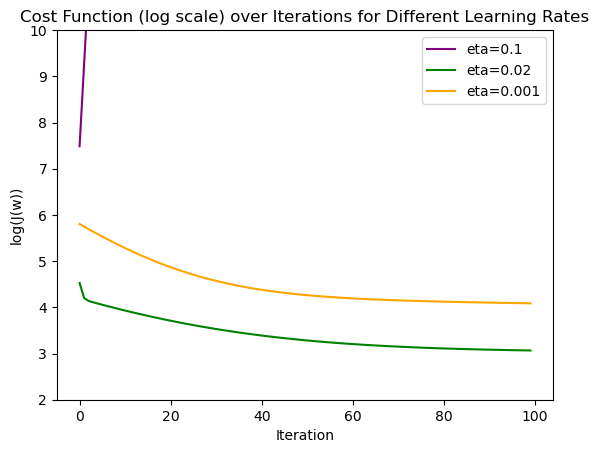

In [20]:
plt.title("Cost Function (log scale) over Iterations for Different Learning Rates")
plt.xlabel("Iteration")
plt.ylabel("log(J(w))")
for idx in range(len(cost_histories)):
  plt.plot(np.log(cost_histories[idx]), label=f'eta={learning_rates[idx]}', color=colors[idx])
plt.ylim(bottom=2, top=10)
plt.legend()
plt.show()

## Regularization: Ridge and Lasso Regression
In this section, we will try to visualize the effect of regularization using **L1 norm (Lasso regression)** and **L2 norm (Ridge regression)**. Let us have a small number of datapoints and try to fit a complex model to it:

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

def generate_data(n=100, noise=10.0):
    np.random.seed(42)
    X = np.random.uniform(-10, 10, n)
    y = X**2 - 2 * X + np.random.randn(n) * noise  # x**2 - 2*x + noise
    return X, y

X, y = generate_data(n=15)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


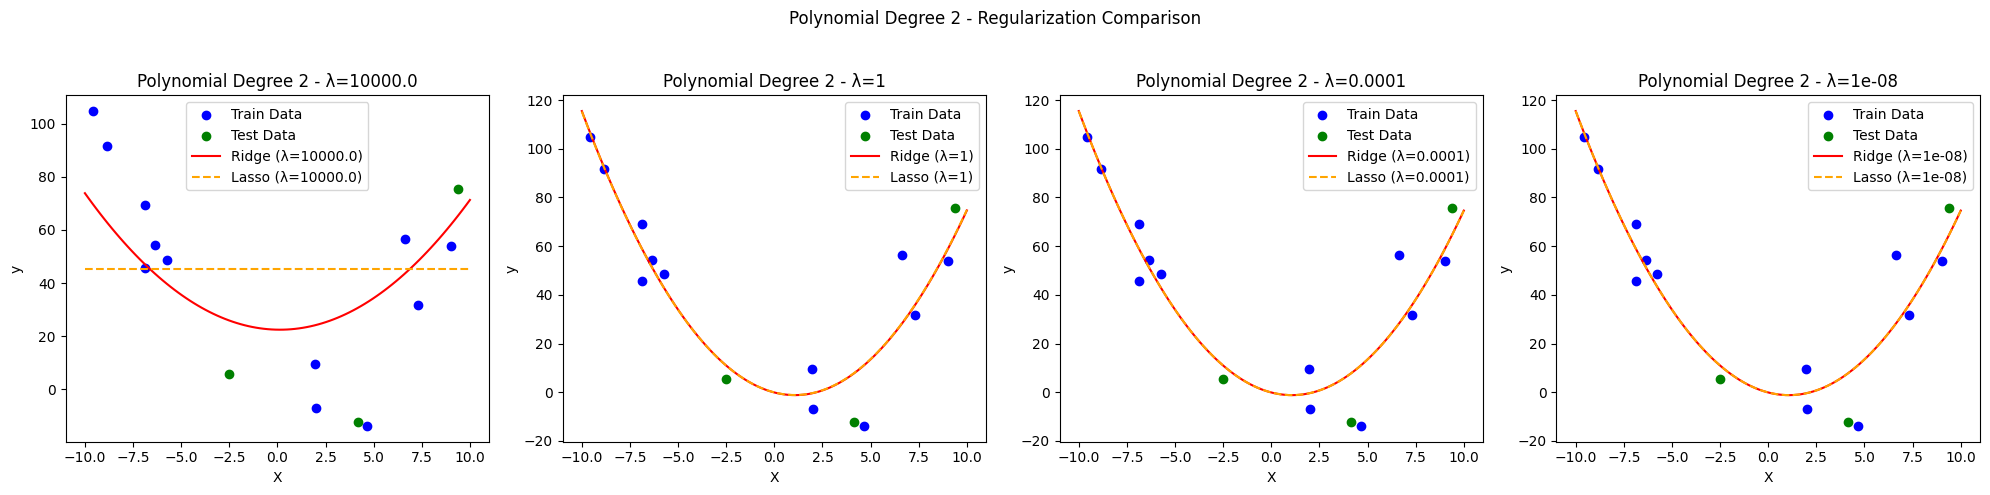

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.735e+00, tolerance: 1.426e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.588e+02, tolerance: 1.426e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.30953e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_d

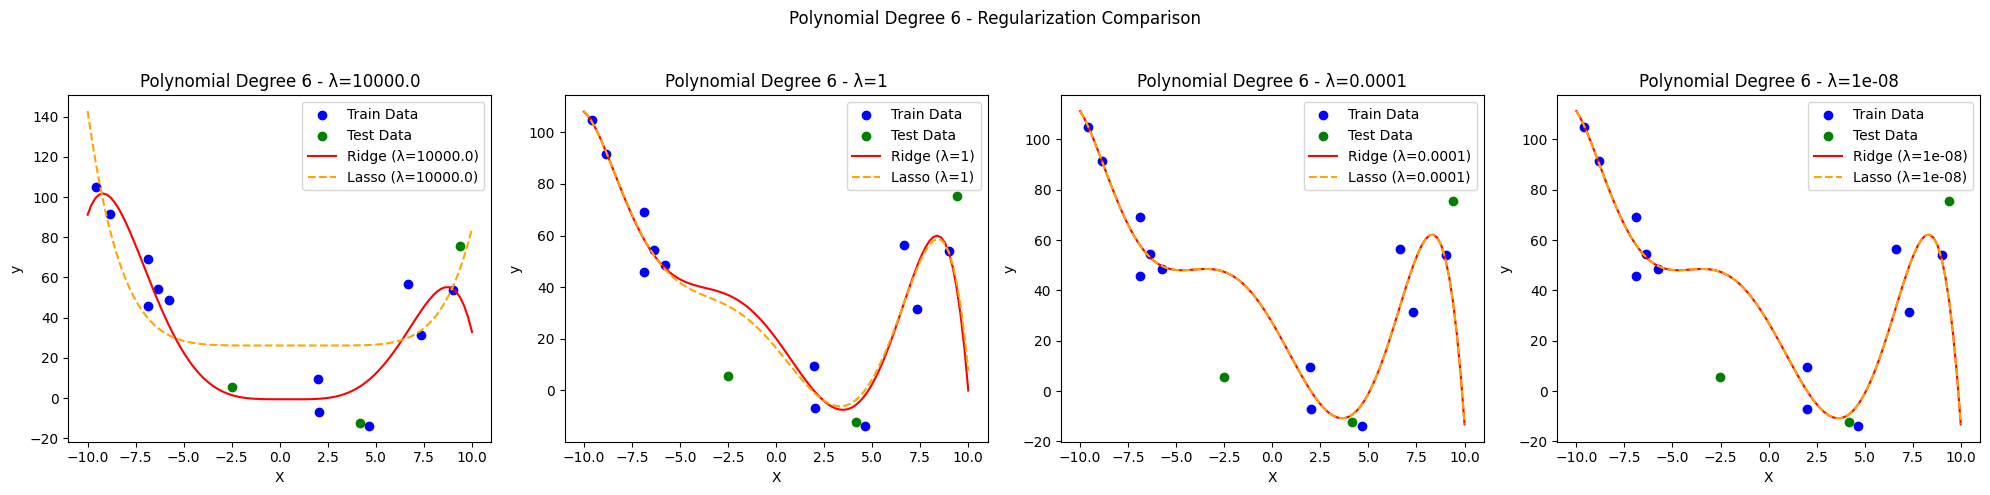

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.824e+02, tolerance: 1.426e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.58344e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.461e+02, tolerance: 1.426e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216

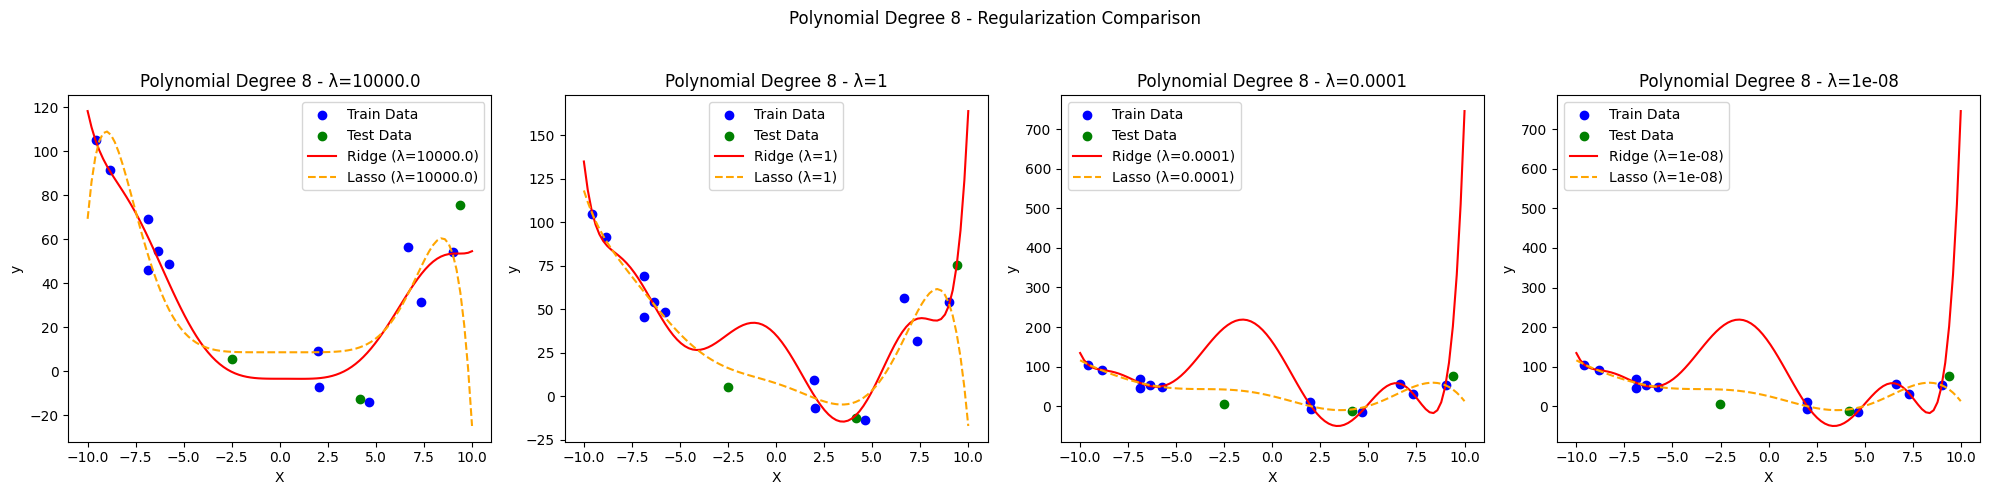

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso

degrees = [2, 6, 8]
lambdas = [1e4, 1, 1e-4, 1e-8]

ridge_rmse_train = np.zeros((len(degrees), len(lambdas)))
ridge_rmse_test = np.zeros((len(degrees), len(lambdas)))
lasso_rmse_train = np.zeros((len(degrees), len(lambdas)))
lasso_rmse_test = np.zeros((len(degrees), len(lambdas)))

for degree_idx, degree in enumerate(degrees):
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))  # Create a 1x4 grid of subplots
    for lambda_idx, lambda_val in enumerate(lambdas):
        # What is the aim of using the below class
        poly_features = PolynomialFeatures(degree=degree)
        # What does the following function do?
        X_train_poly = poly_features.fit_transform(X_train[:, np.newaxis])
        # What does the following function do?
        X_test_poly = poly_features.transform(X_test[:, np.newaxis])

        # Ridge Regression using scikit-learn
        ridge_model = Ridge(alpha=lambda_val)
        ridge_model.fit(X_train_poly, y_train)
        y_train_pred_ridge = ridge_model.predict(X_train_poly)
        y_test_pred_ridge = ridge_model.predict(X_test_poly)

        # Lasso Regression using scikit-learn
        lasso_model = Lasso(alpha=lambda_val, max_iter=10000)
        lasso_model.fit(X_train_poly, y_train)
        y_train_pred_lasso = lasso_model.predict(X_train_poly)
        y_test_pred_lasso = lasso_model.predict(X_test_poly)

        ridge_rmse_train[degree_idx, lambda_idx] = compute_rms_error(y_train, y_train_pred_ridge)
        ridge_rmse_test[degree_idx, lambda_idx] = compute_rms_error(y_test, y_test_pred_ridge)
        lasso_rmse_train[degree_idx, lambda_idx] = compute_rms_error(y_train, y_train_pred_lasso)
        lasso_rmse_test[degree_idx, lambda_idx] = compute_rms_error(y_test, y_test_pred_lasso)

        # Plot the fitted curves for both Ridge and Lasso
        X_plot = np.linspace(-10, 10, 100)
        X_plot_poly = poly_features.transform(X_plot[:, np.newaxis])

        y_plot_ridge = ridge_model.predict(X_plot_poly)
        y_plot_lasso = lasso_model.predict(X_plot_poly)

        ax = axs[lambda_idx]
        ax.scatter(X_train, y_train, color='blue', label='Train Data')
        ax.scatter(X_test, y_test, color='green', label='Test Data')
        ax.plot(X_plot, y_plot_ridge, color='red', label=f'Ridge (λ={lambda_val})')
        ax.plot(X_plot, y_plot_lasso, color='orange', linestyle='--', label=f'Lasso (λ={lambda_val})')
        ax.set_title(f'Polynomial Degree {degree} - λ={lambda_val}')
        ax.set_xlabel('X')
        ax.set_ylabel('y')
        ax.legend()

    plt.suptitle(f'Polynomial Degree {degree} - Regularization Comparison')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


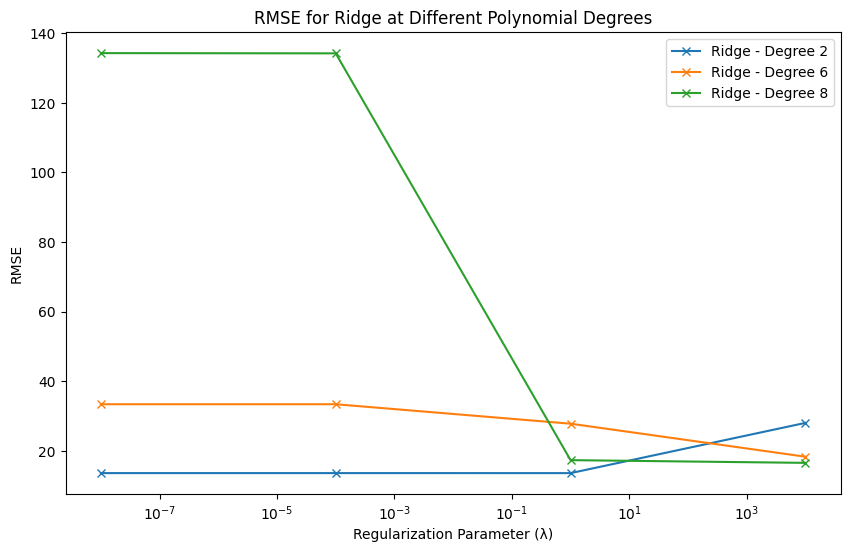

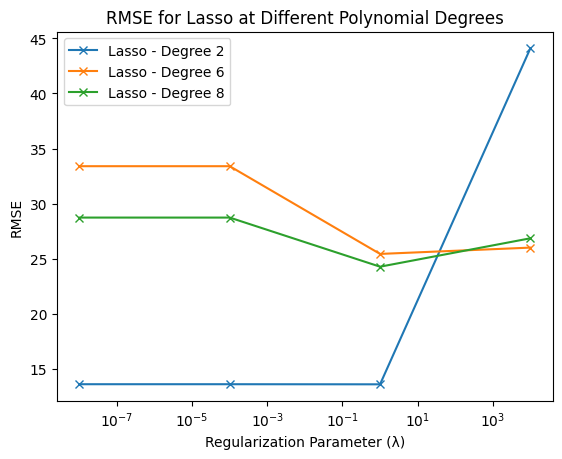

In [ ]:
# plot RMSE
plt.figure(figsize=(10, 6))

for degree_idx, degree in enumerate(degrees):
    plt.plot(lambdas, ridge_rmse_test[degree_idx], marker='x', label=f'Ridge - Degree {degree}')
plt.xscale('log')
plt.xlabel('Regularization Parameter (λ)')
plt.ylabel('RMSE')
plt.title('RMSE for Ridge at Different Polynomial Degrees')
plt.legend()
plt.show()

for degree_idx, degree in enumerate(degrees):
  plt.plot(lambdas, lasso_rmse_test[degree_idx], marker='x', label=f'Lasso - Degree {degree}')

plt.xscale('log')
plt.xlabel('Regularization Parameter (λ)')
plt.ylabel('RMSE')
plt.title('RMSE for Lasso at Different Polynomial Degrees')
plt.legend()
plt.show()

# Real-World Example 1: California House Price Prediction


## Dataset
We'll use the California Housing Dataset available in scikit-learn.

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X, y = housing.data, housing.target

feature_names = housing.feature_names
print("Feature names:", feature_names)

Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


## Data Preprocessing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Implement Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse:.2f}")

Test RMSE: 0.75


## Feature Importance

In [ ]:
coefficients = model.coef_
for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef:.3f}")

MedInc: 0.854
HouseAge: 0.123
AveRooms: -0.294
AveBedrms: 0.339
Population: -0.002
AveOccup: -0.041
Latitude: -0.897
Longitude: -0.870


## Visualize Actual vs Predicted Prices

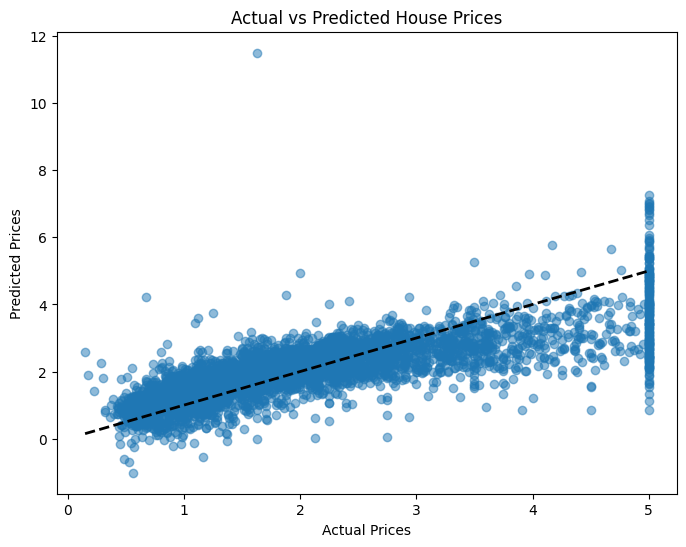

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

# Real-World Example 2: Tehran House Price Prediction

Fot this section, we will use regression to predict hourse prices in different regions of Tehran. The [Dataset](https://www.kaggle.com/datasets/mokar2001/house-price-tehran-iran) used is records on Divar website.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [ ]:
file_path = './assets/housePrice.xlsx'
df = pd.read_excel(file_path)

df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,PriceUSD
0,63,1,True,True,True,Shahran,1850000000,61666.67
1,60,1,True,True,True,Shahran,1850000000,61666.67
2,79,2,True,True,True,Pardis,550000000,18333.33
3,95,2,True,True,True,Shahrake Qods,902500000,30083.33
4,123,2,True,True,True,Shahrake Gharb,7000000000,233333.33


In [ ]:
print(df['Area'].describe())
print(df[df['Area'] > 1e6])

count    3.479000e+03
mean     8.744000e+06
std      3.167266e+08
min      3.000000e+01
25%      6.900000e+01
50%      9.000000e+01
75%      1.200000e+02
max      1.616000e+10
Name: Area, dtype: float64
             Area  Room  Parking  Warehouse  Elevator            Address  \
570    3310000000     2     True       True      True        Ostad Moein   
709   16160000000     3     True       True      True           Pasdaran   
1604   8400000000     2     True       True      True         Gheitarieh   
2802   2550000000     2     True       True      True  Central Janatabad   

            Price   PriceUSD  
570    3310000000  110333.33  
709   16160000000  538666.67  
1604   8700000000  290000.00  
2802   2550000000   85000.00  


In [ ]:
# Data cleaning - removing outliers based on IQR
Q1_area = df['Area'].quantile(0.25)
Q3_area = df['Area'].quantile(0.75)
IQR_area = Q3_area - Q1_area

Q1_price = df['PriceUSD'].quantile(0.25)
Q3_price = df['PriceUSD'].quantile(0.75)
IQR_price = Q3_price - Q1_price

lower_bound_area = Q1_area - 1.5 * IQR_area
upper_bound_area = Q3_area + 1.5 * IQR_area

lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

df_cleaned = df[(df['Area'] >= lower_bound_area) & (df['Area'] <= upper_bound_area) &
                (df['PriceUSD'] >= lower_bound_price) & (df['PriceUSD'] <= upper_bound_price)]

# Check the cleaned dataset
df_cleaned.describe()


,Area,Room,Price,PriceUSD
count,3112.000000,3112.000000,3.112000e+03,3112.000000
mean,90.353470,1.948265,3.393833e+09,113127.752988
std,30.790158,0.638090,2.844133e+09,94804.436318
min,30.000000,0.000000,3.600000e+06,120.000000
25%,66.000000,2.000000,1.250000e+09,41666.670000
50%,86.000000,2.000000,2.450000e+09,81666.670000
75%,109.000000,2.000000,4.500000e+09,150000.000000
max,192.000000,5.000000,1.282500e+10,427500.000000


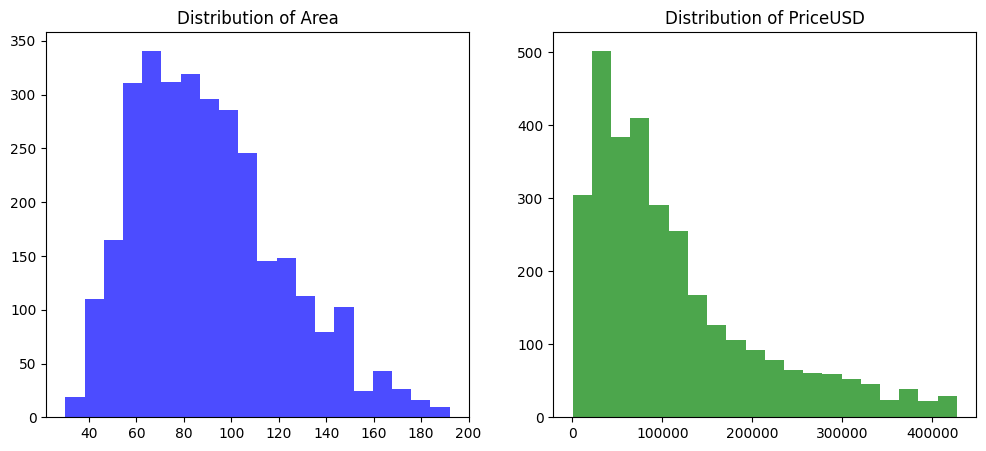

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df_cleaned['Area'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Area')

plt.subplot(1, 2, 2)
plt.hist(df_cleaned['PriceUSD'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of PriceUSD')

plt.show()

In [ ]:
# Function to compute the Root Mean Squared Error (RMSE)
def compute_rms_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Function to create polynomial features
def polynomial_features(X, degree):
    poly = PolynomialFeatures(degree=degree)
    return poly.fit_transform(X)

# Function to perform polynomial regression
def polynomial_regression(X, y, degree):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    return model


Processing address: Shahran


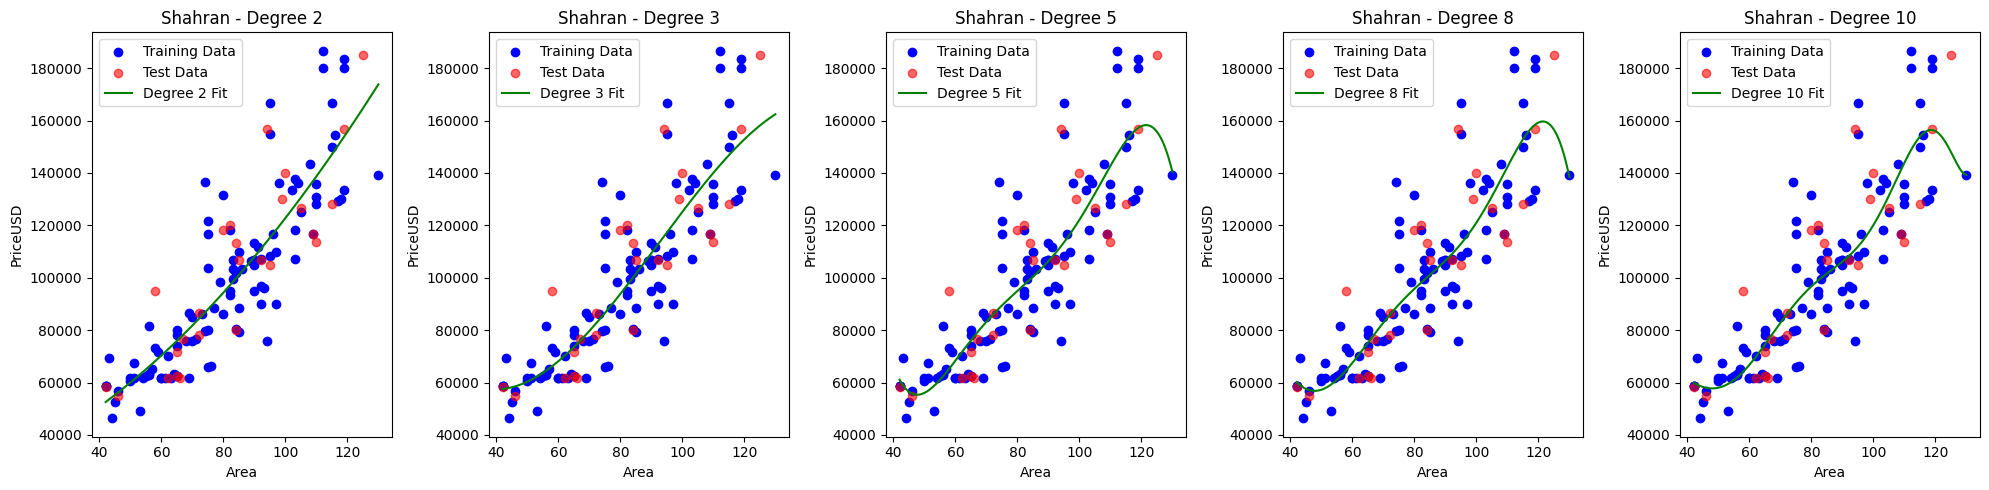

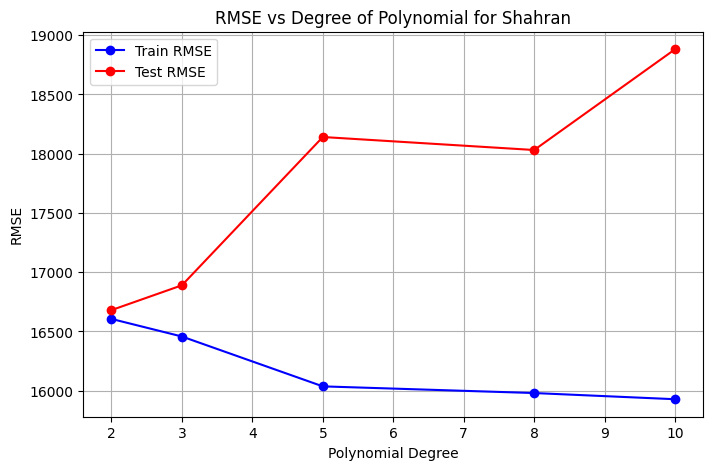

Processing address: Pardis


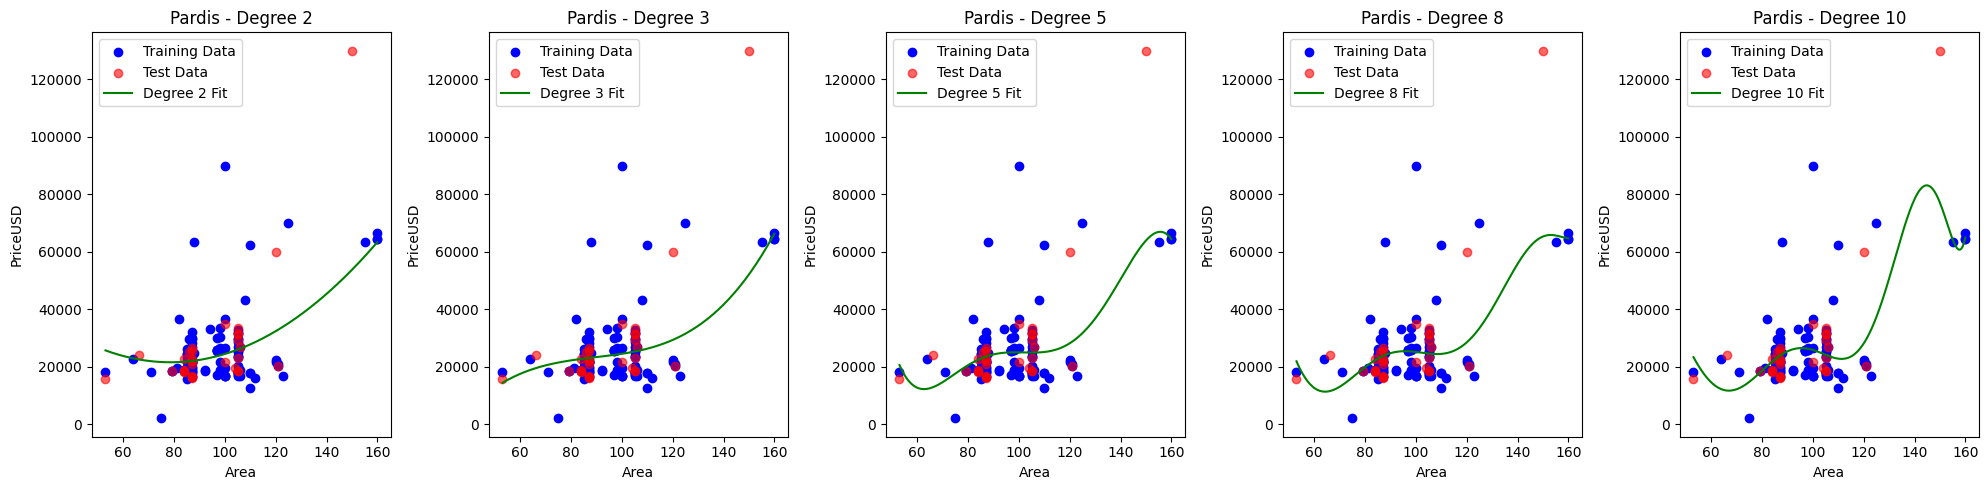

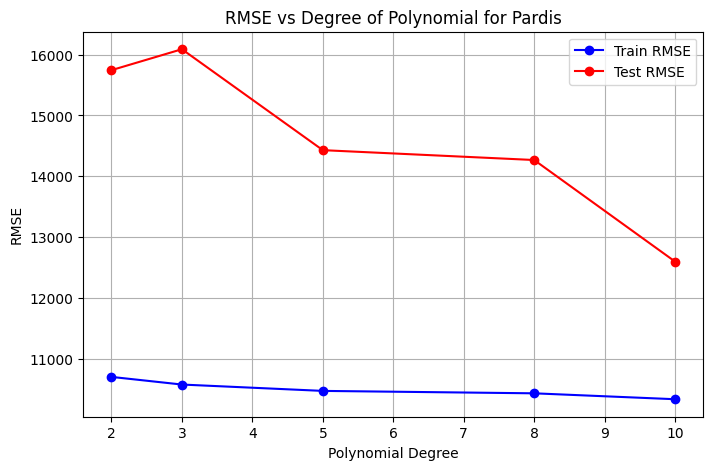

Processing address: West Ferdows Boulevard


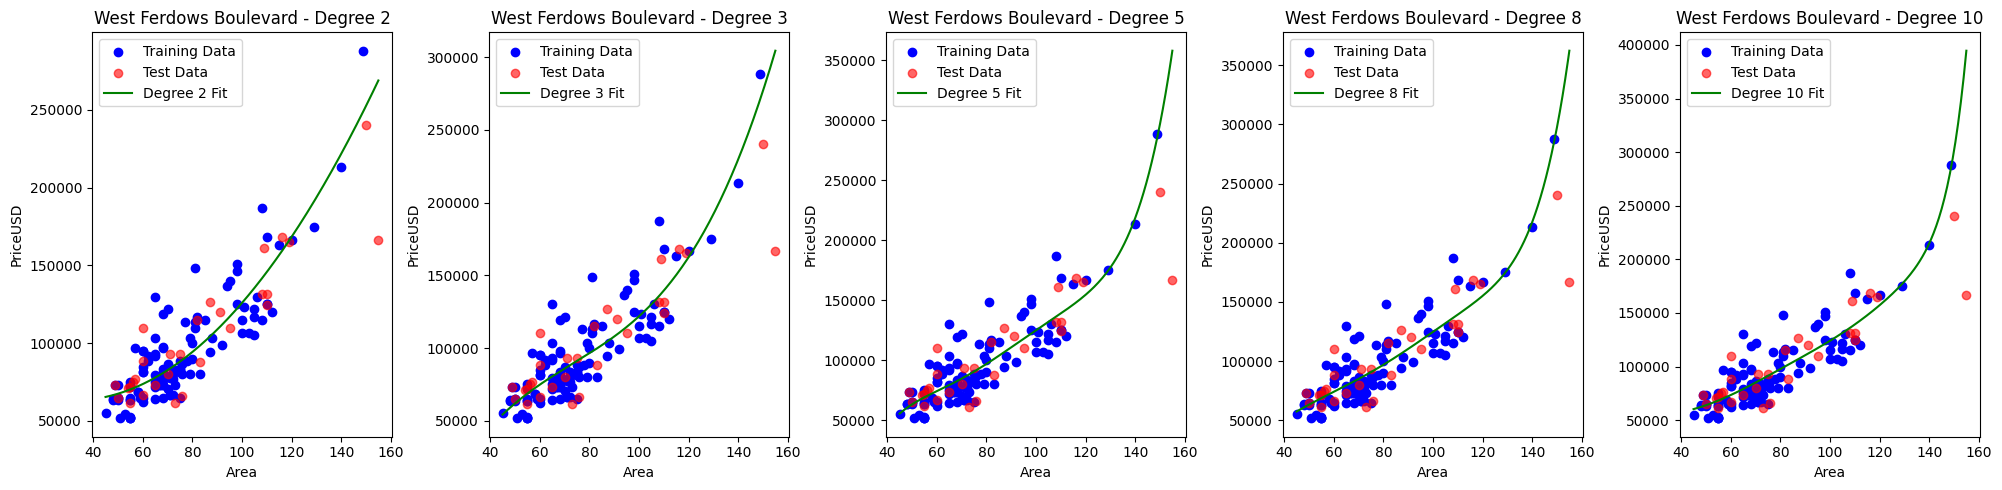

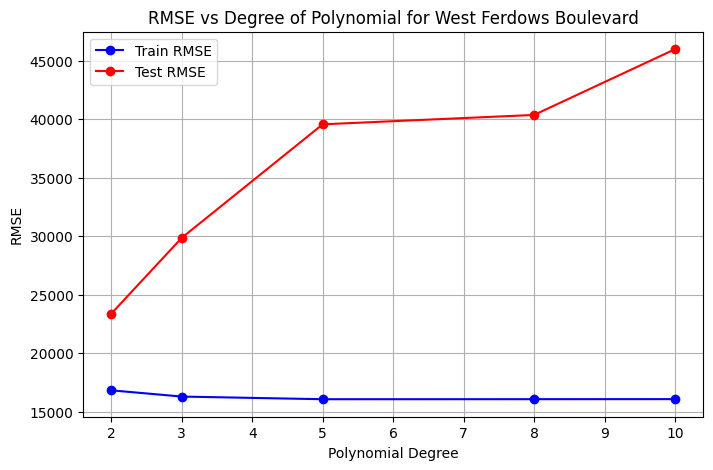

Skipping address nan due to insufficient samples.
Processing address: Parand


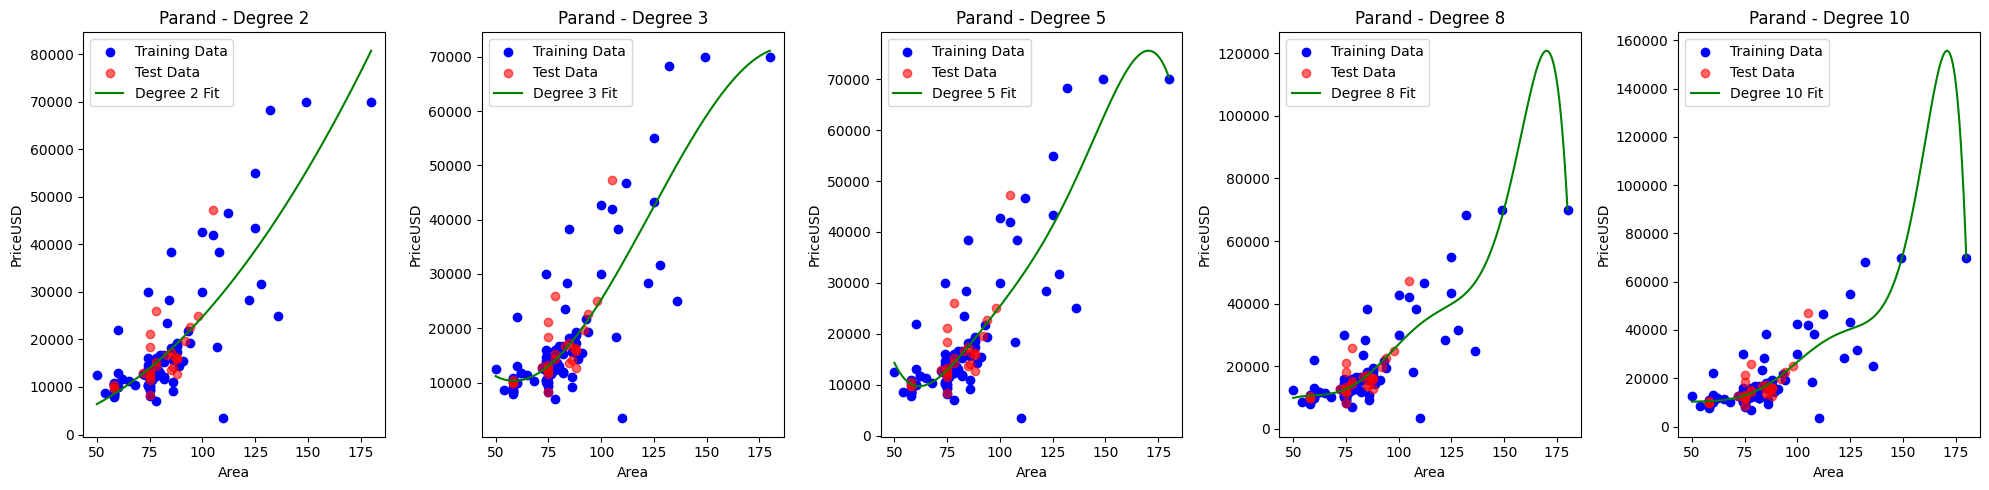

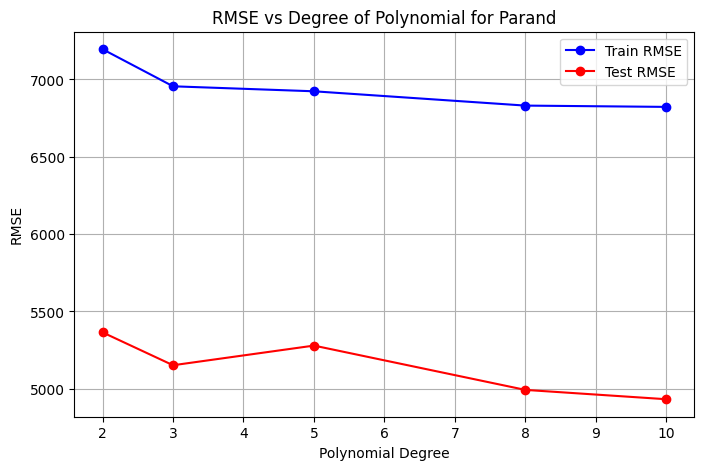

Processing address: Punak


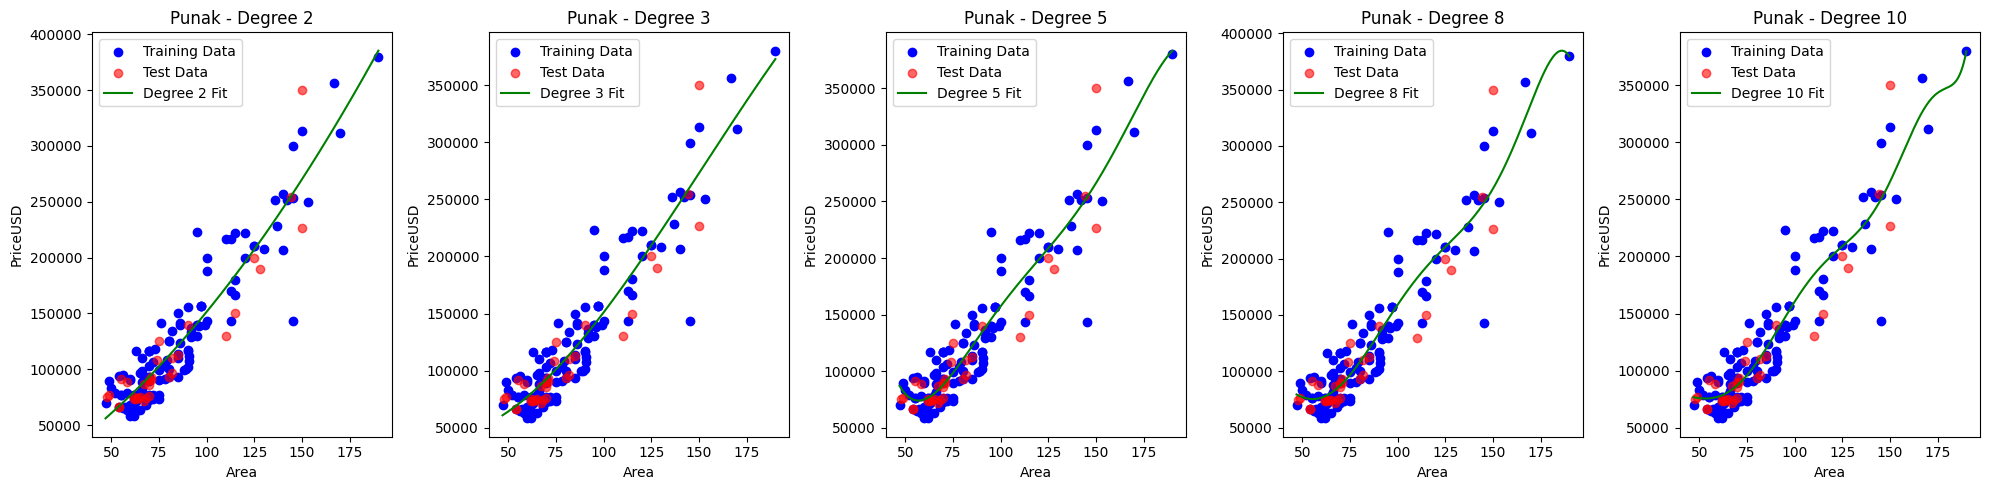

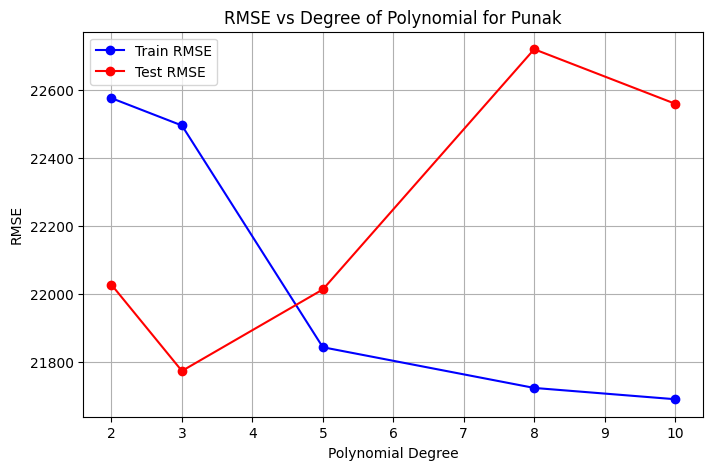

Skipping address Pakdasht KhatunAbad due to insufficient samples.
Skipping address Chahardangeh due to insufficient samples.
Skipping address Baqershahr due to insufficient samples.
Skipping address Bahar due to insufficient samples.
Skipping address Chardivari due to insufficient samples.
Skipping address Sohanak due to insufficient samples.
Skipping address Zibadasht due to insufficient samples.
Skipping address Chardangeh due to insufficient samples.
Skipping address Villa due to insufficient samples.
Skipping address Azari due to insufficient samples.
Skipping address Shahrake Apadana due to insufficient samples.
Skipping address Darband due to insufficient samples.
Skipping address Eram due to insufficient samples.
Skipping address SabaShahr due to insufficient samples.
Skipping address Shahrake Madaen due to insufficient samples.
Skipping address Salehabad due to insufficient samples.
Skipping address Enghelab due to insufficient samples.
Skipping address Islamshahr Elahieh due t

In [ ]:
# Group by 'Address' and perform analysis for each region
addresses = df_cleaned['Address'].unique()

for address in addresses:
    df_address = df_cleaned[df_cleaned['Address'] == address]

    # Skip if not enough data points
    if len(df_address) < 2:
        print(f"Skipping address {address} due to insufficient samples.")
        continue

    X = df_address[['Area']]
    y = df_address['PriceUSD']

    # Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Skip if train or test sets are empty
    if len(X_train) < 50 or len(X_test) < 25:
        # print(f"Skipping address {address} due to train-test split issues.")
        continue
    else:
      print(f"Processing address: {address}")

    # Set polynomial degrees to evaluate
    degrees = [2, 3, 5, 8, 10]

    train_rms_errors = []
    test_rms_errors = []

    for degree in degrees:
        model = polynomial_regression(X_train, y_train, degree)

        X_train_poly = polynomial_features(X_train, degree)
        y_train_pred = model.predict(X_train_poly)

        X_test_poly = polynomial_features(X_test, degree)
        y_test_pred = model.predict(X_test_poly)

        train_rms_error = compute_rms_error(y_train, y_train_pred)
        test_rms_error = compute_rms_error(y_test, y_test_pred)

        train_rms_errors.append(train_rms_error)
        test_rms_errors.append(test_rms_error)

        # print(f"Address: {address}, Degree {degree}: Train RMSE = {train_rms_error:.2f}, Test RMSE = {test_rms_error:.2f}")

        # Visualize Polynomial Regression for each degree
    fig, axs = plt.subplots(1, len(degrees), figsize=(20, 5))  # Create a grid for subplots

    for idx, degree in enumerate(degrees):
        model = polynomial_regression(X_train, y_train, degree)

        X_train_poly = polynomial_features(X_train, degree)
        y_train_pred = model.predict(X_train_poly)

        X_test_poly = polynomial_features(X_test, degree)
        y_test_pred = model.predict(X_test_poly)

        # Scatter plot of actual data and polynomial fit
        axs[idx].scatter(X_train, y_train, color='blue', label="Training Data")
        axs[idx].scatter(X_test, y_test, color='red', label="Test Data", alpha=0.6)
        X_fit = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
        X_fit_poly = polynomial_features(X_fit, degree)
        y_fit_pred = model.predict(X_fit_poly)
        axs[idx].plot(X_fit, y_fit_pred, label=f"Degree {degree} Fit", color='green')
        axs[idx].set_title(f"{address} - Degree {degree}")
        axs[idx].set_xlabel("Area")
        axs[idx].set_ylabel("PriceUSD")
        axs[idx].legend()

    plt.tight_layout()
    plt.show()


    # Plot Train RMSE and Test RMSE vs Polynomial Degree for each address
    plt.figure(figsize=(8, 5))
    plt.plot(degrees, train_rms_errors, marker='o', label='Train RMSE', color='blue')
    plt.plot(degrees, test_rms_errors, marker='o', label='Test RMSE', color='red')
    plt.title(f"RMSE vs Degree of Polynomial for {address}")
    plt.xlabel("Polynomial Degree")
    plt.ylabel("RMSE")
    plt.legend()
    plt.grid(True)
    plt.show()